In [2]:
using LTspice, Plots
pyplot()

Plots.PyPlotBackend()

In [3]:
example2 = LTspiceSimulation("example2.asc",tempdir=true)

LTspiceSimulation:
circuit path = C:\Users\Chris\AppData\Local\Temp\jl_9FEF.tmp\example2.asc

Parameters
vin                       = 4.0
iout                      = 1.0
rset                      = 40200.0

Measurements
pin                      
pout                     


In [4]:
vin_list = linspace(6.0,20.0,10)
iout_list = linspace(0.5,3.0,4)
rfb(vout)= 0.6*60.4e3/(vout-0.6)
function compute_efficiency_array(vin_list, iout_list, vout)
    efficiency = Array(Float64,(length(vin_list),length(iout_list)))
    for vin_index in eachindex(vin_list)
        for iout_index in eachindex(iout_list)
            (pin,pout) = example2(vin_list[vin_index],iout_list[iout_index],rfb(vout))
            efficiency[vin_index,iout_index] = -pout/pin
        end
    end
    return efficiency
end
@time efficiency = compute_efficiency_array(vin_list, iout_list, 3.3)

362.796289 seconds (650.17 k allocations: 29.094 MB, 0.00% gc time)


10×4 Array{Float64,2}:
 0.95462   0.94973   0.934758  0.957266
 0.94911   0.945495  0.932968  0.929867
 0.92224   0.930968  0.921149  0.916875
 0.905417  0.921007  0.91426   0.90921 
 0.894005  0.91472   0.910306  0.89961 
 0.881026  0.907781  0.906431  0.899784
 0.868617  0.90075   0.901538  0.895198
 0.857644  0.893588  0.896626  0.889653
 0.844297  0.886398  0.892506  0.887364
 0.831286  0.880318  0.887253  0.883542


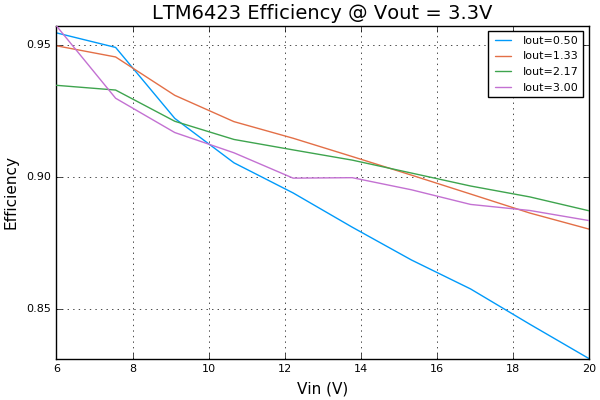

In [5]:
plt = plot()
for iout_index in eachindex(iout_list)
    plot!(plt,vin_list,efficiency[:,iout_index],label = "Iout="*@sprintf("%2.2f",iout_list[iout_index]))
end
plot!(plt, title = "LTM6423 Efficiency @ Vout = 3.3V")
plot!(plt, xlabel = "Vin (V)", ylabel = "Efficiency")